<a href="https://colab.research.google.com/github/MrunaliShigawan/SatelliteImageProcessing/blob/master/Unet_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:89: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_265 (Conv2D)             (None, None, None, 6 1792        input_12[0][0]                   
__________________________________________________________________________________________________
conv2d_266 (Conv2D)             (None, None, None, 6 36928       conv2d_265[0][0]                 
__________________________________________________________________________________________________
batch_normalization_100 (BatchN (None, None, None, 6 256         conv2d_266[0][0]                 
___________________________________________________________________________________________

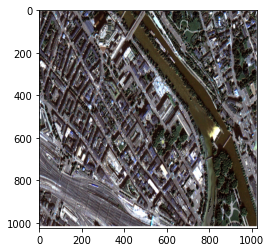

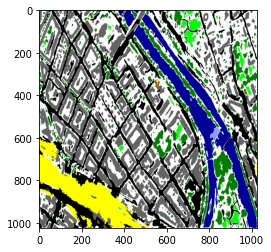

Generated 8 patches
Images were read
Road = 23.47 %
Tree = 0.29 %
Bare Soil = 0.0 %
Rail = 10.14 %
Building = 23.59 %
Field = 0.33 %
Water Bodies = 11.67 %
Water Pool = 0.0 %
Unclassified = 30.51 %


<Figure size 3600x3600 with 0 Axes>

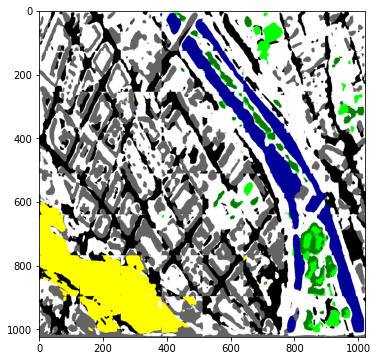

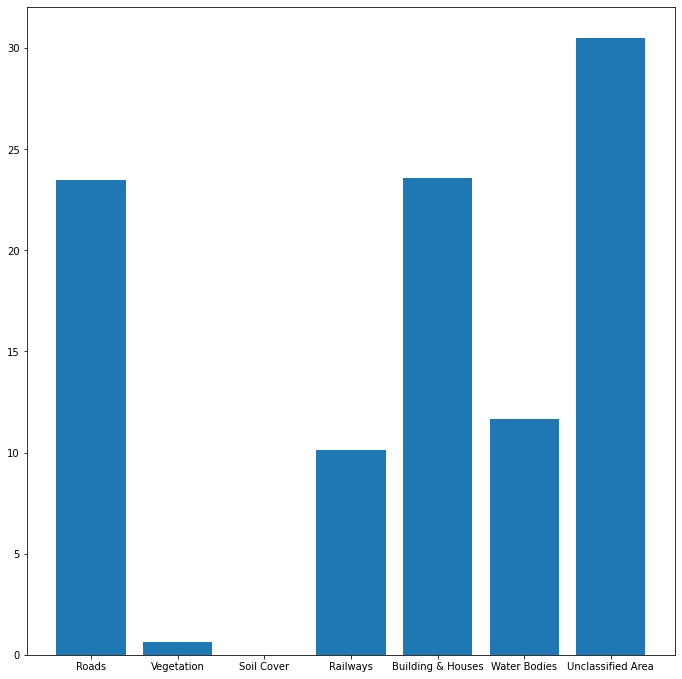

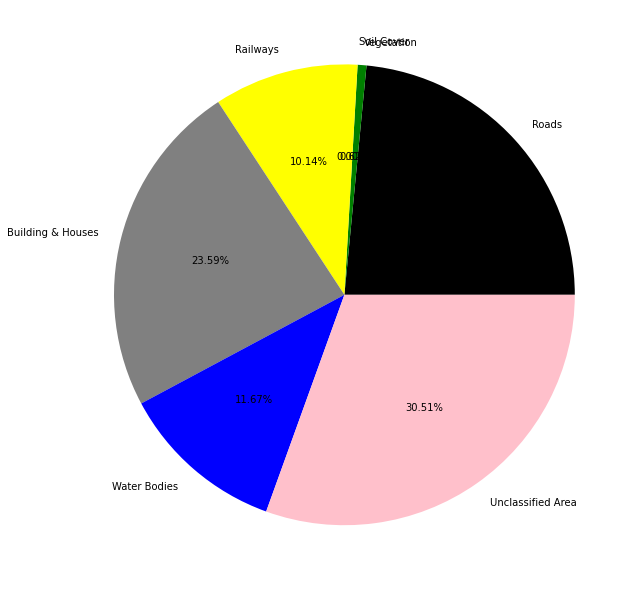

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Dec  8 13:02:31 2019

@author: lenovo
"""
import PIL
from PIL import Image
import random
import numpy as np
import numpy as np
from keras.callbacks import CSVLogger
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.models import *
from keras.layers import *
from keras.optimizers import *
import matplotlib.pyplot as plt

color_dict = {0: (0, 0, 0),
              1: (0, 125, 0),
              2: (150, 80, 0),
              3: (255, 255, 0),
              4: (100, 100, 100),
              5: (0, 255, 0),
              6: (0, 0, 150),
              7: (150, 150, 255),
              8: (255, 255, 255)}

weights_file = "/content/drive/My Drive/unet_finalweights.h5"
def UNet(shape = (None,None,3)):
    
    # Left side of the U-Net
    inputs = Input(shape)
#    in_shape = inputs.shape
#    print(in_shape)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv4)
    conv4 = BatchNormalization()(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
    
    # Bottom of the U-Net
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv5)
    conv5 = BatchNormalization()(conv5)
    drop5 = Dropout(0.5)(conv5)
    
    # Upsampling Starts, right side of the U-Net
    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv6)
    conv6 = BatchNormalization()(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv7)
    conv7 = BatchNormalization()(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv8)
    conv8 = BatchNormalization()(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv9)
    conv9 = Conv2D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv9)
    conv9 = BatchNormalization()(conv9)

    # Output layer of the U-Net with a softmax activation
    conv10 = Conv2D(9, 1, activation = 'softmax')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    model.summary()
    
    return model 
model = UNet()


def get_rand_patch(img, true, xc=128):
    """
    :param img: ndarray with shape (x_sz, y_sz, num_channels)
    :param mask: binary ndarray with shape (x_sz, y_sz, num_classes)
    :param sz: size of random patch
    :return: patch with shape (sz, sz, num_channels)
    """
    #assert len(img.shape) == 3 and img.shape[0] > sz and img.shape[1] > sz and img.shape[0:2] == mask.shape[0:2]
    #print(img.shape)
    #print(true.shape)
    yc=xc
    for i in range(8):
      patch_img = img[(xc*(i-1)):(xc*i), (yc*(i-1)):(yc*i)]
      patch_true = true[(xc*(i-1)):(xc*i), (yc*(i-1)):(yc*i)]

    return patch_img, patch_true


def get_patches(img, true, n_patches, sz=128,img_id=1):
    x = list()
    y = list()
    
    total_patches = 0
    while total_patches < n_patches:
      for i in range(8):
        patch_img = img[(128*(total_patches)):(128*(total_patches+1)), (128*(i)):(128*(i+1))]
        patch_true = true[(128*(total_patches)):(128*(total_patches+1)), (128*(i)):(128*(i+1))]
        x.append(patch_img)
        y.append(patch_true)
      total_patches += 1
    print('Generated {} patches'.format(total_patches))
    return np.array(x), np.array(y)

def rgb_to_onehot(rgb_arr, color_dict):
    num_classes = len(color_dict)
    shape = rgb_arr.shape[:2]+(num_classes,)
    #print(shape)
    arr = np.zeros( shape, dtype=np.int8 )
    for i, cls in enumerate(color_dict):
        arr[:,:,i] = np.all(rgb_arr.reshape( (-1,3) ) == color_dict[i], axis=1).reshape(shape[:2])
    return arr

def onehot_to_rgb(onehot, color_dict):
    single_layer = np.argmax(onehot, axis=-1)
    output = np.zeros( onehot.shape[:2]+(3,) )
    for k in color_dict.keys():
        output[single_layer==k] = color_dict[k]
    return np.uint8(output)


img_id=2
print('Reading images')
img = Image.open('/content/drive/My Drive/img_jpg/0{}.jpg'.format(img_id))
img=img.resize((1024,1024), PIL.Image.ANTIALIAS)
true = Image.open('/content/drive/My Drive/train_mask/0{}.jpg'.format(img_id))
true=true.resize((1024,1024), PIL.Image.ANTIALIAS)
plt.imshow(img)
plt.show()
plt.imshow(true)
plt.show()
true = np.array(true)
img = np.array(img)
#print(img.shape)
#img_m = Image.open('./data/sat/{}.png'.format(img_id))
#img_m = np.array(img_m)
#print (img_m.shape)
#img_m = tiff.imread('./sat_test/0{}.tif'.format(img_id))
#img = Image.open('./images/0{}.png'.format(img_id))
#mask = resizeimage.resize_contain(img_m, [img_m.shape[0], img_m.shape[1]])
#true=Image.open('./predictions/0{}.jpg'.format(img_id))
#img=img.resize((img_m.shape[1],img_m.shape[0]), PIL.Image.ANTIALIAS)

x_train,  y_true = get_patches(img,true, n_patches=8, sz=128)

print('Images were read')
#f, axarr = plt.subplots(len(x_train),3,figsize=(50, 50))
#f.subplots_adjust(hspace=0.1, wspace=0.1)
#plt.tight_layout()
#axarr.set_xticklabels([])
#axarr.set_yticklabels([])
#axarr.set_xticks([])
#axarr.set_yticks([])
from matplotlib import gridspec
fig = plt.figure(figsize=(50, 50)) 
gs = gridspec.GridSpec(len(x_train), 3, width_ratios=[1, 1, 1],wspace=0.1, hspace=0.1, top=0.95, bottom=0.05, left=0.0, right=0.2) 
n=0
model.load_weights(weights_file)
x=y=0
image1=np.zeros((1024,1024,3))
for i_ in range(len(x_train)):
    
    item = x_train[i_]
    
    h,w,c = item.shape
    
    item = np.reshape(item,(1,h,w,c))
    
        
    y_pred_test_img = model.predict(item)
    
    ba,h,w,c = y_pred_test_img.shape
    
    
    y_pred_test_img = np.reshape(y_pred_test_img,(h,w,c))
    #img=np.uint8(y_pred_test_img)
    img = y_pred_test_img
    

    h, w, c = img.shape
    for i in range(h):
      for j in range(w):
                
        argmax_index = np.argmax(img[i,j])
                
        sudo_onehot_arr = np.zeros((9))
                
        sudo_onehot_arr[argmax_index] = 1
                
        onehot_encode = sudo_onehot_arr
                
        img[i,j,:] = onehot_encode
    y_pred_test_img = onehot_to_rgb(img, color_dict)
    #print(y_pred_test_img.shape)
    if y<8:
      image1[(128*(x)):(128*(x+1)), (128*(y)):(128*(y+1)),:]=y_pred_test_img
      y=y+1
    else:
      y=0
      x=x+1
      image1[(128*(x)):(128*(x+1)), (128*(y)):(128*(y+1)),:]=y_pred_test_img
      y=y+1  
image1=np.uint8(image1)
#imx = Image.fromarray((image1 * 255).astype(np.uint8))
imx = Image.fromarray(image1)
imx=imx.resize((1024,1024), PIL.Image.ANTIALIAS)
plt.figure(figsize=(6,6))
plt.imshow(imx)


#comment this 
imx = Image.fromarray(true)

black=darkgreen=brown=yellow=gray=green=blue=purple=white=total_pix=0

for pixel in imx.getdata():
    #total_pix += 1
    if pixel == (0,0,0):
        black += 1
    elif pixel == (0, 125, 0):
        darkgreen += 1
    elif pixel == (150, 80, 0):
        brown += 1
    elif pixel == (255, 255, 0):
        yellow += 1
    elif pixel == (100, 100, 100):
        gray += 1
    elif pixel == (0, 255, 0):
        green += 1
    elif pixel == (0, 0, 150):
        blue += 1
    elif pixel == (150, 150, 255):
        purple += 1
    elif pixel == (255, 255, 255):
        white += 1
total_pix=black+darkgreen+brown+yellow+gray+green+blue+purple+white
road=round((black/total_pix)*100,2)
tree=round((darkgreen/total_pix)*100,2)
soil=round((brown/total_pix)*100,2)
rail=round((yellow/total_pix)*100,2)
building=round((gray/total_pix)*100,2)
field=round((green/total_pix)*100,2)
water=round((blue/total_pix)*100,2) 
pool=round((purple/total_pix)*100,2) 
unclassified=round((white/total_pix)*100,2)
print("Road = {} %".format(road))
print("Tree = {} %".format(tree))
print("Bare Soil = {} %".format(soil))
print( "Rail = {} %".format(rail))
print( "Building = {} %".format(building))
print( "Field = {} %".format(field))
print( "Water Bodies = {} %".format(water))
print( "Water Pool = {} %".format(pool))
print( "Unclassified = {} %".format(unclassified))  
plt.savefig('grid_figure.pdf')

fig = plt.figure(figsize=(9,9))
ax = fig.add_axes([0,0,1,1])
Features = ['Roads', 'Vegetation', 'Soil Cover', 'Railways', 'Building & Houses','Water Bodies','Unclassified Area']
TotalLandCover = [road,tree+field,soil,rail,building,water+pool,unclassified]
ax.bar(Features,TotalLandCover)
plt.show()

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Features = ['Roads', 'Vegetation', 'Soil Cover', 'Railways', 'Building & Houses','Water Bodies','Unclassified Area']
TotalLandCover = [float(black),float(green+darkgreen),float(brown),float(yellow),float(gray),float(blue+purple),float(white)]
colors = ['black','green','brown','yellow','gray','blue','pink']
ax.pie(TotalLandCover, labels = Features,colors=colors,autopct='%1.2f%%')
plt.show()

In [ ]:
!pip install tensorflow==1.14.0


     |████████████████████████████████| 109.2MB 83kB/s 
     |████████████████████████████████| 491kB 43.9MB/s 
     |████████████████████████████████| 3.2MB 33.8MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2
